##### Load libs:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

##### 1.Create connect:

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

##### 2.Load data:

In [3]:
data = pd.io.sql.read_sql(
    "SELECT " \
        "CASE " \
            "WHEN CAST(strftime('%w', timestamp) AS INT) BETWEEN 1 AND 5 THEN 'working' " \
            "ELSE 'weekend' " \
        "END AS type, " \
        "CAST(strftime('%H', timestamp) AS INT) AS hour " \
    "FROM checker " \
    "WHERE uid LIKE 'user_%' ",
    connect
)

##### 3.Hist:

In [9]:
data[data['type']=='weekend'].count()

type    1170
hour    1170
dtype: int64

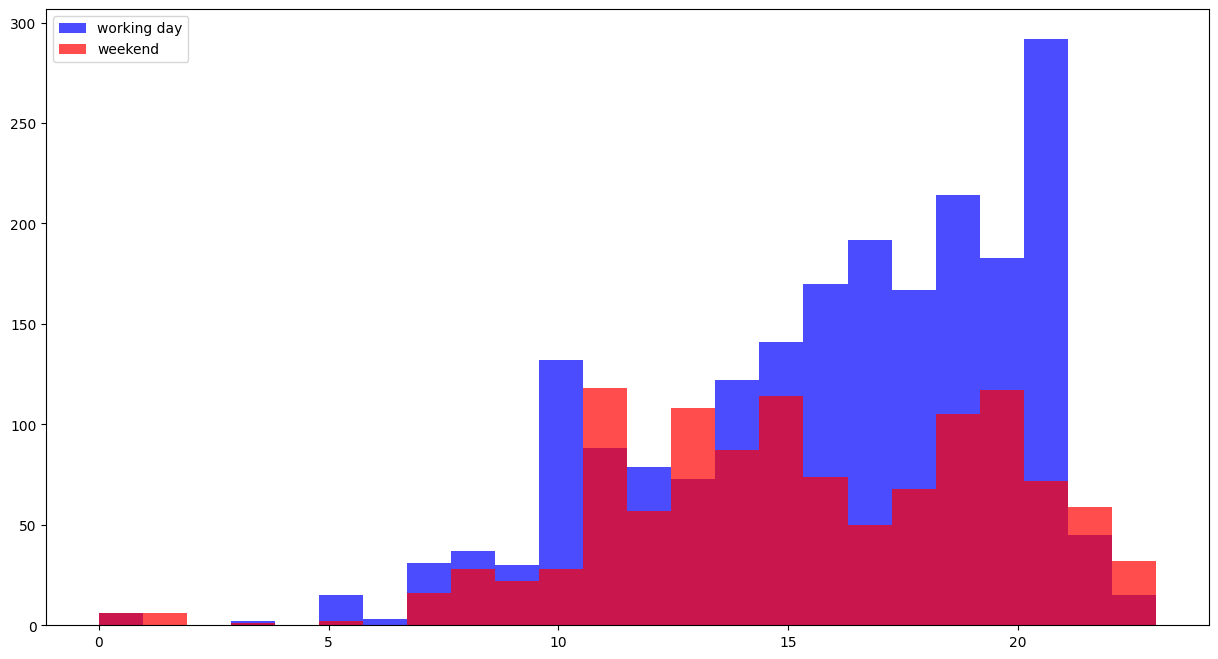

In [4]:
plt.figure(figsize=(15,8))

plt.hist(
	data[data['type']=='working']['hour'].to_list(),
	bins=24,
	alpha=0.7,
	color="#0000FF",
	label='working day'
)
plt.hist(
	data[data['type']=='weekend']['hour'].to_list(),
	bins=24,
	alpha=0.7,
	color="#FF0000",
	label='weekend'
)

plt.legend(loc='upper left')

##### 4.Question:

Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни?<br>Ответ: ДА, в 11, 13, 22, 23 часа

##### 5.Close connect:

In [5]:
connect.close()